### **Análisis De Datos - Proyecto Final**
### Universidad de Guanajuato
### Silvia Cecilia Avalos Mendoza

### Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
#from sklearn import preprocessing
#from sklearn.neighbors import KNeighborsClassifier

### Reectructuración de datos

In [2]:
# Importamos el dataset
pacientes = pd.read_csv('/content/Pacientes2.csv', engine = 'python', index_col = 0)
# Mostramos en pantalla el dataset
pacientes

,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
890,SI,1,1,1,0,0,70,1,0,0,0
892,NO,0,0,0,0,0,39,0,0,0,0
904,NO,1,0,1,1,0,45,0,0,1,0


In [3]:
# Mostramos la información sobre el contenido del Dataset
# Con esto se verá que procesos necesita tener el Dataset para poder ser utilizado
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 1 to 909
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Enfermedad  985 non-null    object
 1   HIPERTEN    985 non-null    int64 
 2   HIPERGLU    985 non-null    int64 
 3   HDLBAJA     985 non-null    int64 
 4   HIPERTRI    985 non-null    int64 
 5   CINTALTA    985 non-null    int64 
 6   EDAD        985 non-null    int64 
 7   GENERO      985 non-null    int64 
 8   FUMA        985 non-null    int64 
 9   ALCOHOL     985 non-null    int64 
 10  POLIURIA    985 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 92.3+ KB


In [4]:
# Con la información anterior vemos que se trata de un dataset muy limpio
# Pero aún así será reestructurado

# Se eliminan algunas columnas, lo que quiero mostrar en mis resultados es la diferencia
# que existe en la predicción usando solo los datos que se relacionan con causas totalmente
# fisiológicas y cómo es que el alcohol y tabaco afectan en las personas.

pacientes1 = pacientes.drop(['CINTALTA','FUMA','ALCOHOL'], axis=1)
pacientes1.dtypes
#Cintalta no encontré significado
#sindrome metabolico (S_Metabolico)
#lipoproteínas de alta densidad  (HDL)

Enfermedad    object
HIPERTEN       int64
HIPERGLU       int64
HDLBAJA        int64
HIPERTRI       int64
EDAD           int64
GENERO         int64
POLIURIA       int64
dtype: object

In [5]:
# Se renombran las columnas
pacientes1.columns = ['S_Metabolico','Hipertensión','Hiperglucosa','HDL_baja','Hipertrigliceridemia','Edad','Género','Poliuria']
pacientes1

,S_Metabolico,Hipertensión,Hiperglucosa,HDL_baja,Hipertrigliceridemia,Edad,Género,Poliuria
NOEXPED,,,,,,,,
1,NO,0,0,1,0,38,0,0
2,SI,0,1,1,1,49,1,0
3,SI,1,1,0,1,59,1,1
4,NO,1,1,0,0,44,0,0
5,NO,0,0,1,0,42,0,0
...,...,...,...,...,...,...,...,...
890,SI,1,1,1,0,70,1,0
892,NO,0,0,0,0,39,0,0
904,NO,1,0,1,1,45,0,0


In [6]:
# Se reacomoda el orden de las columnas
Pacientes = pacientes1.reindex(columns=['S_Metabolico','Edad','Género','HDL_baja','Hiperglucosa','Hipertensión','Hipertrigliceridemia', 'Poliuria'])
Pacientes

,S_Metabolico,Edad,Género,HDL_baja,Hiperglucosa,Hipertensión,Hipertrigliceridemia,Poliuria
NOEXPED,,,,,,,,
1,NO,38,0,1,0,0,0,0
2,SI,49,1,1,1,0,1,0
3,SI,59,1,0,1,1,1,1
4,NO,44,0,0,1,1,0,0
5,NO,42,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
890,SI,70,1,1,1,1,0,0
892,NO,39,0,0,0,0,0,0
904,NO,45,0,1,0,1,1,0


### Análisis exploratorio

Distribución de datos del DataFrame "Pacientes"

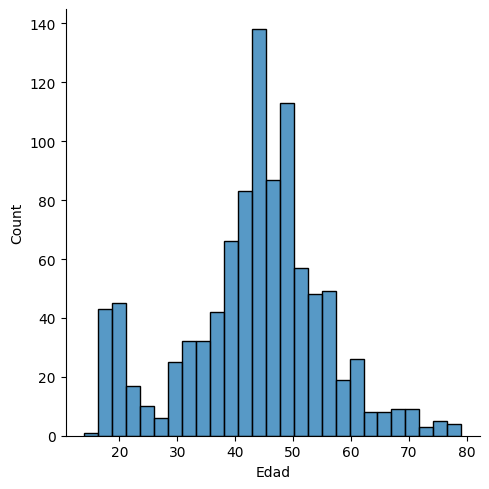

In [7]:
sns.displot(Pacientes['Edad'])

Boxplots sin hue del DataFrame "pacientes"

<Axes: xlabel='EDAD', ylabel='FUMA'>

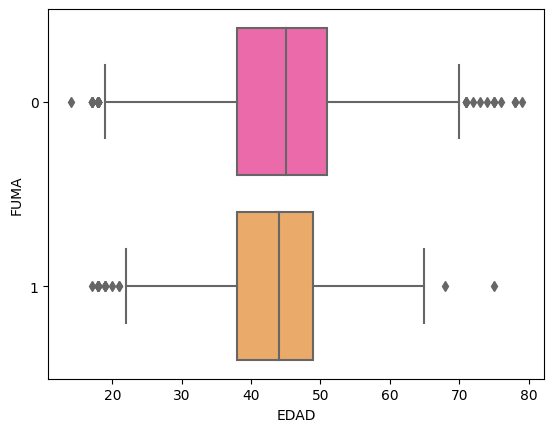

In [8]:
sns.boxplot(data=pacientes, y="FUMA", x="EDAD", palette='spring', orient='h')

<Axes: xlabel='EDAD', ylabel='ALCOHOL'>

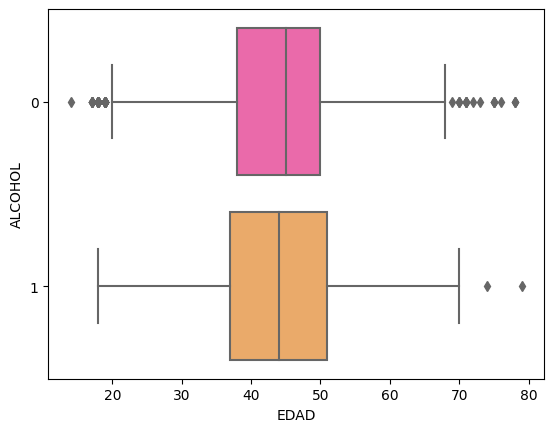

In [9]:
sns.boxplot(data=pacientes, y="ALCOHOL", x="EDAD", palette='spring', orient='h')

Heatmap del DataFrame "Pacientes"

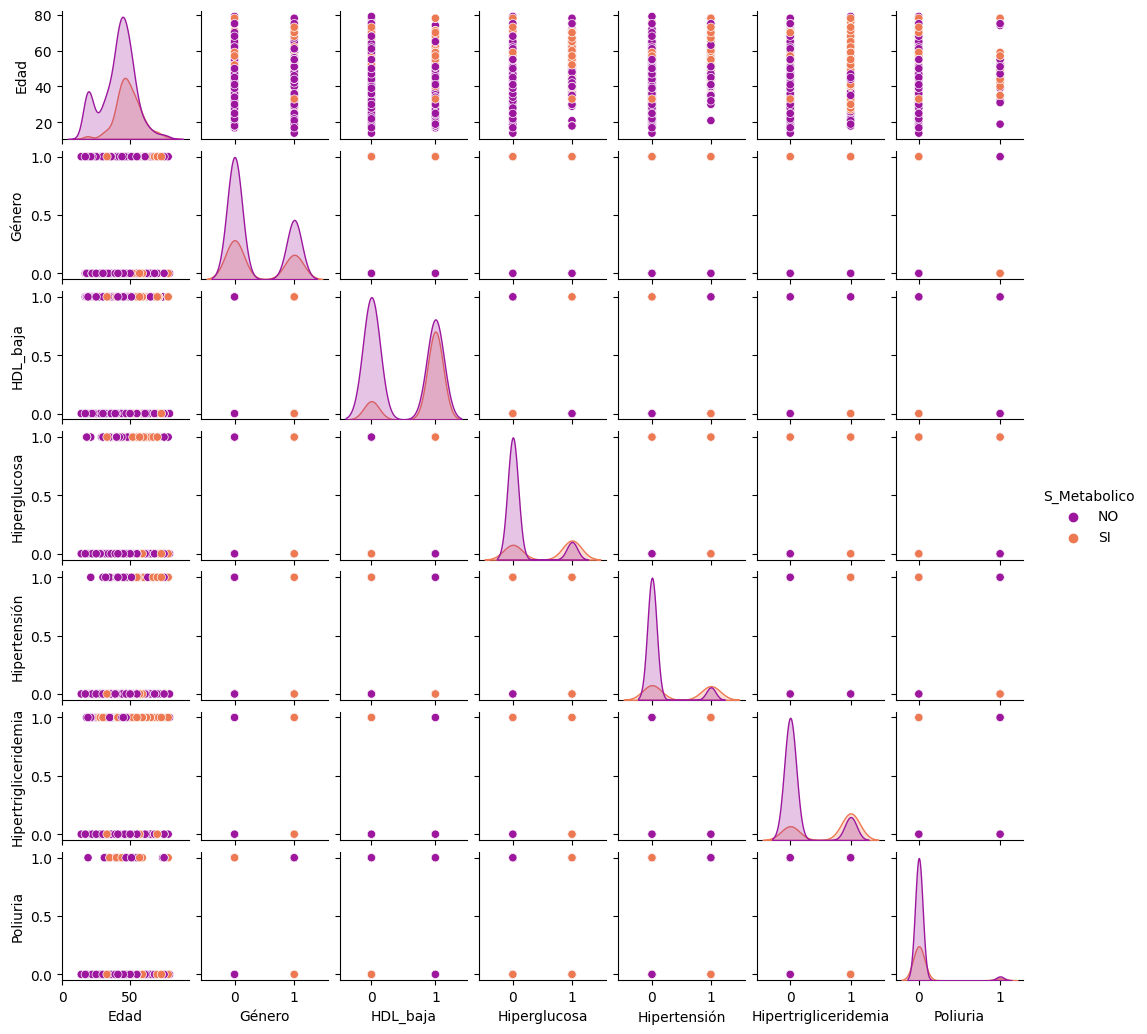

In [10]:
sns.pairplot(Pacientes, hue="S_Metabolico", height=1.5, palette='plasma');

Matriz de correlaciones del Dataframe "Pacientes"

<ipython-input-11-532ef45c9734>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Pacientes.corr()
<ipython-input-11-532ef45c9734>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Pacientes.corr(), vmin=-1, vmax=1, annot=True, cmap="plasma", linewidths=.5)


<Axes: >

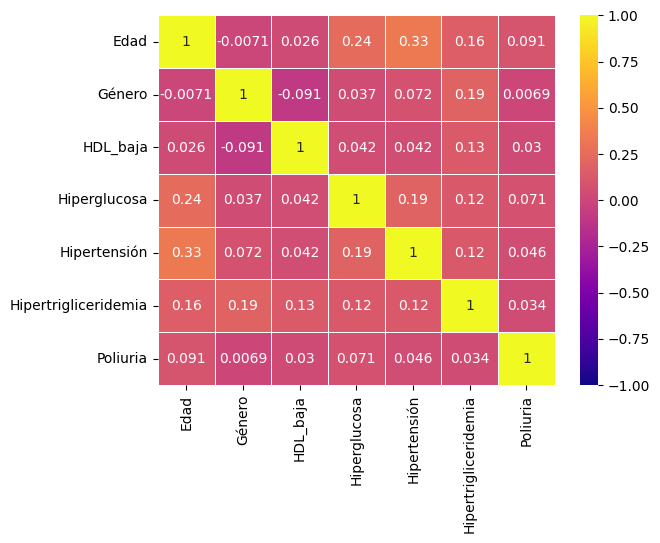

In [11]:
Pacientes.corr()
sns.heatmap(Pacientes.corr(), vmin=-1, vmax=1, annot=True, cmap="plasma", linewidths=.5)

### Métodos de Machine Learning


Árboles de decisión, para el DataFrame "Pacientes".
No contiene las columnas de la información sobre si los pacientes fuman o no

In [12]:
#Separamos el dataset en variables predictoras y variables a predecir
X = Pacientes.iloc[:,1:11] #Predictoras
Y = Pacientes.iloc[:,0] #A predecir

# Tomamos los datos para prueba y entrenamiento, donde:
# Entrenamiento: X_train, Y_train
# Prueba: X_test, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.80, random_state=0)

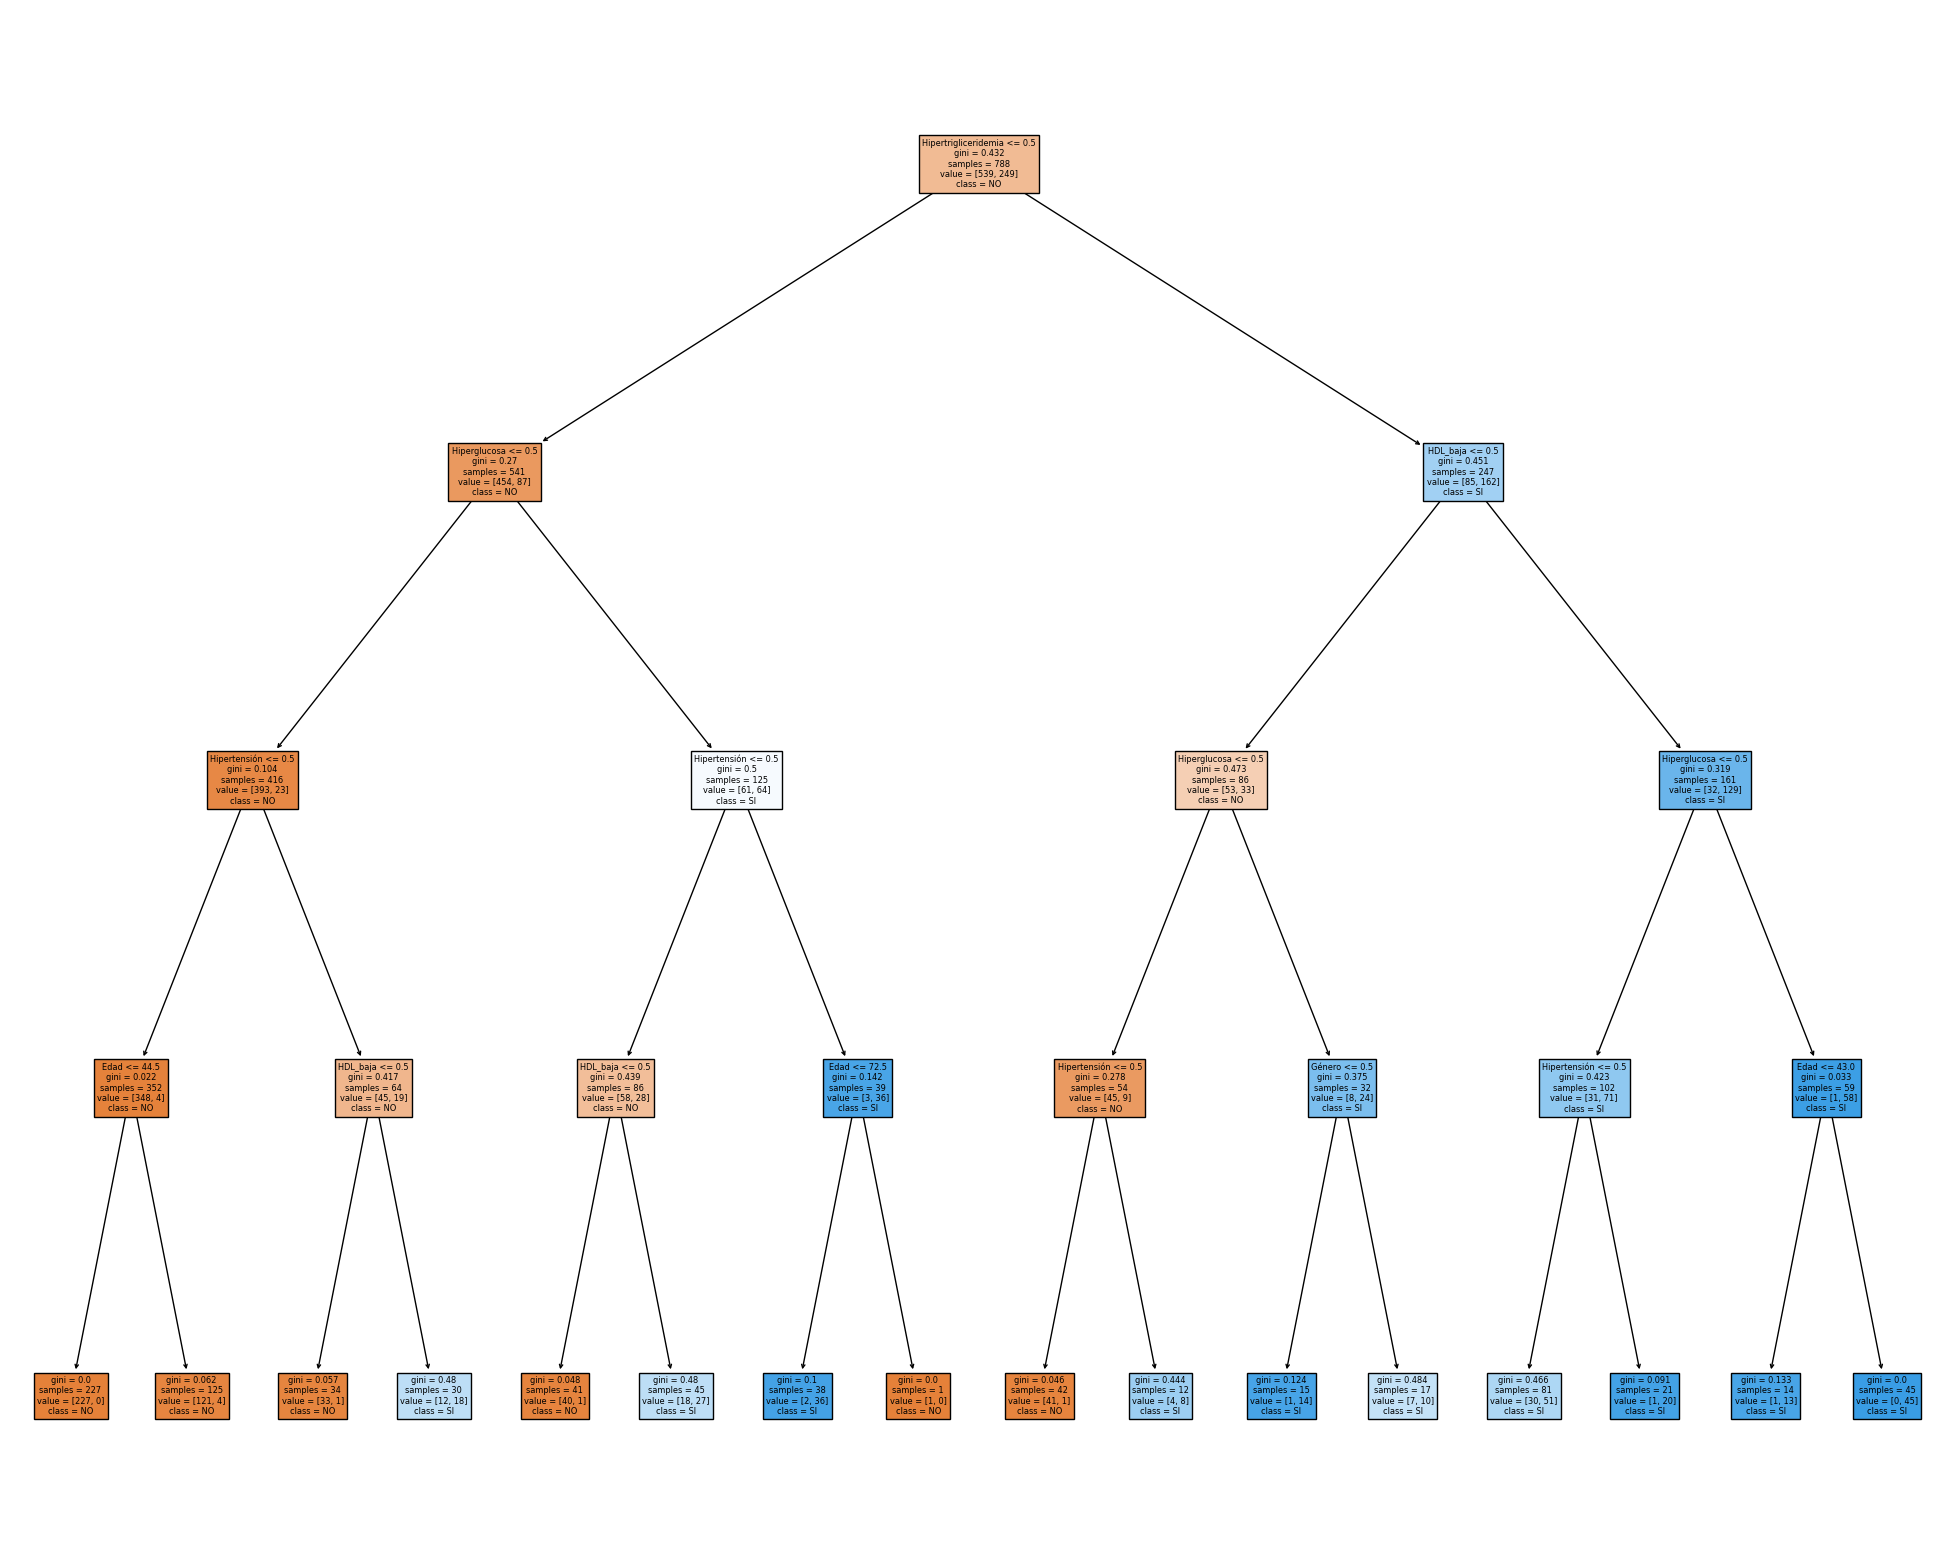

La matriz de confusión es:


array([[131,  19],
       [  0,  47]])

In [13]:
# GENERAMOS EL ÁRBOL DE DECISIÓN 
arbol = DecisionTreeClassifier(max_depth=4)
#arbol = DecisionTreeClassifier() #ARBOL DE DECISIÓN COMPLETO
ArbEnfer = arbol.fit(X_train, Y_train)

# Mostramos el árbol completo en pantalla
ima = plt.figure(figsize=(25,20))
tree.plot_tree(ArbEnfer, feature_names=list(X.columns.values), class_names=list(Y.values), filled=True)
plt.show()
# Guardamos el resultado del árbol en una imagen
ima.savefig('Árbol de decisión.png')

# Nota: todas las flechas de lado izquierdo que aparecen en el árbol pertenecen a la respuesta verdadero
# y las flechas del lado derecho pertenecen a la respuesta falso

# Obtenemos la precisión del modelo, para esto creamos una matriz de confusión 
Y_pred = ArbEnfer.predict(X_test) #Valores predichos
MatConf = confusion_matrix(Y_test, Y_pred)
print("La matriz de confusión es:")
MatConf

In [14]:
#Calculamos la precisión del modelo
Precision = np.sum(MatConf.diagonal())/np.sum(MatConf)

# Calculamos la precisión por cada una de las clases
NoEnf_precision = ((MatConf[0,0]))/sum(MatConf[0,])
print("Precisión de personas no enfermas:", NoEnf_precision)
SiEnf_precision = ((MatConf[1,1]))/sum(MatConf[1,])
print("Precisión de personas enfermas:", SiEnf_precision)

Precisión de personas no enfermas: 0.8733333333333333
Precisión de personas enfermas: 1.0


Repetimos este método pero ahora con el Dataset completo. Esto con el fin de demostrar qué tanto cambian los resulados cuando se tiene la información sobre si los pacientes consumen alcohol y tabaco.

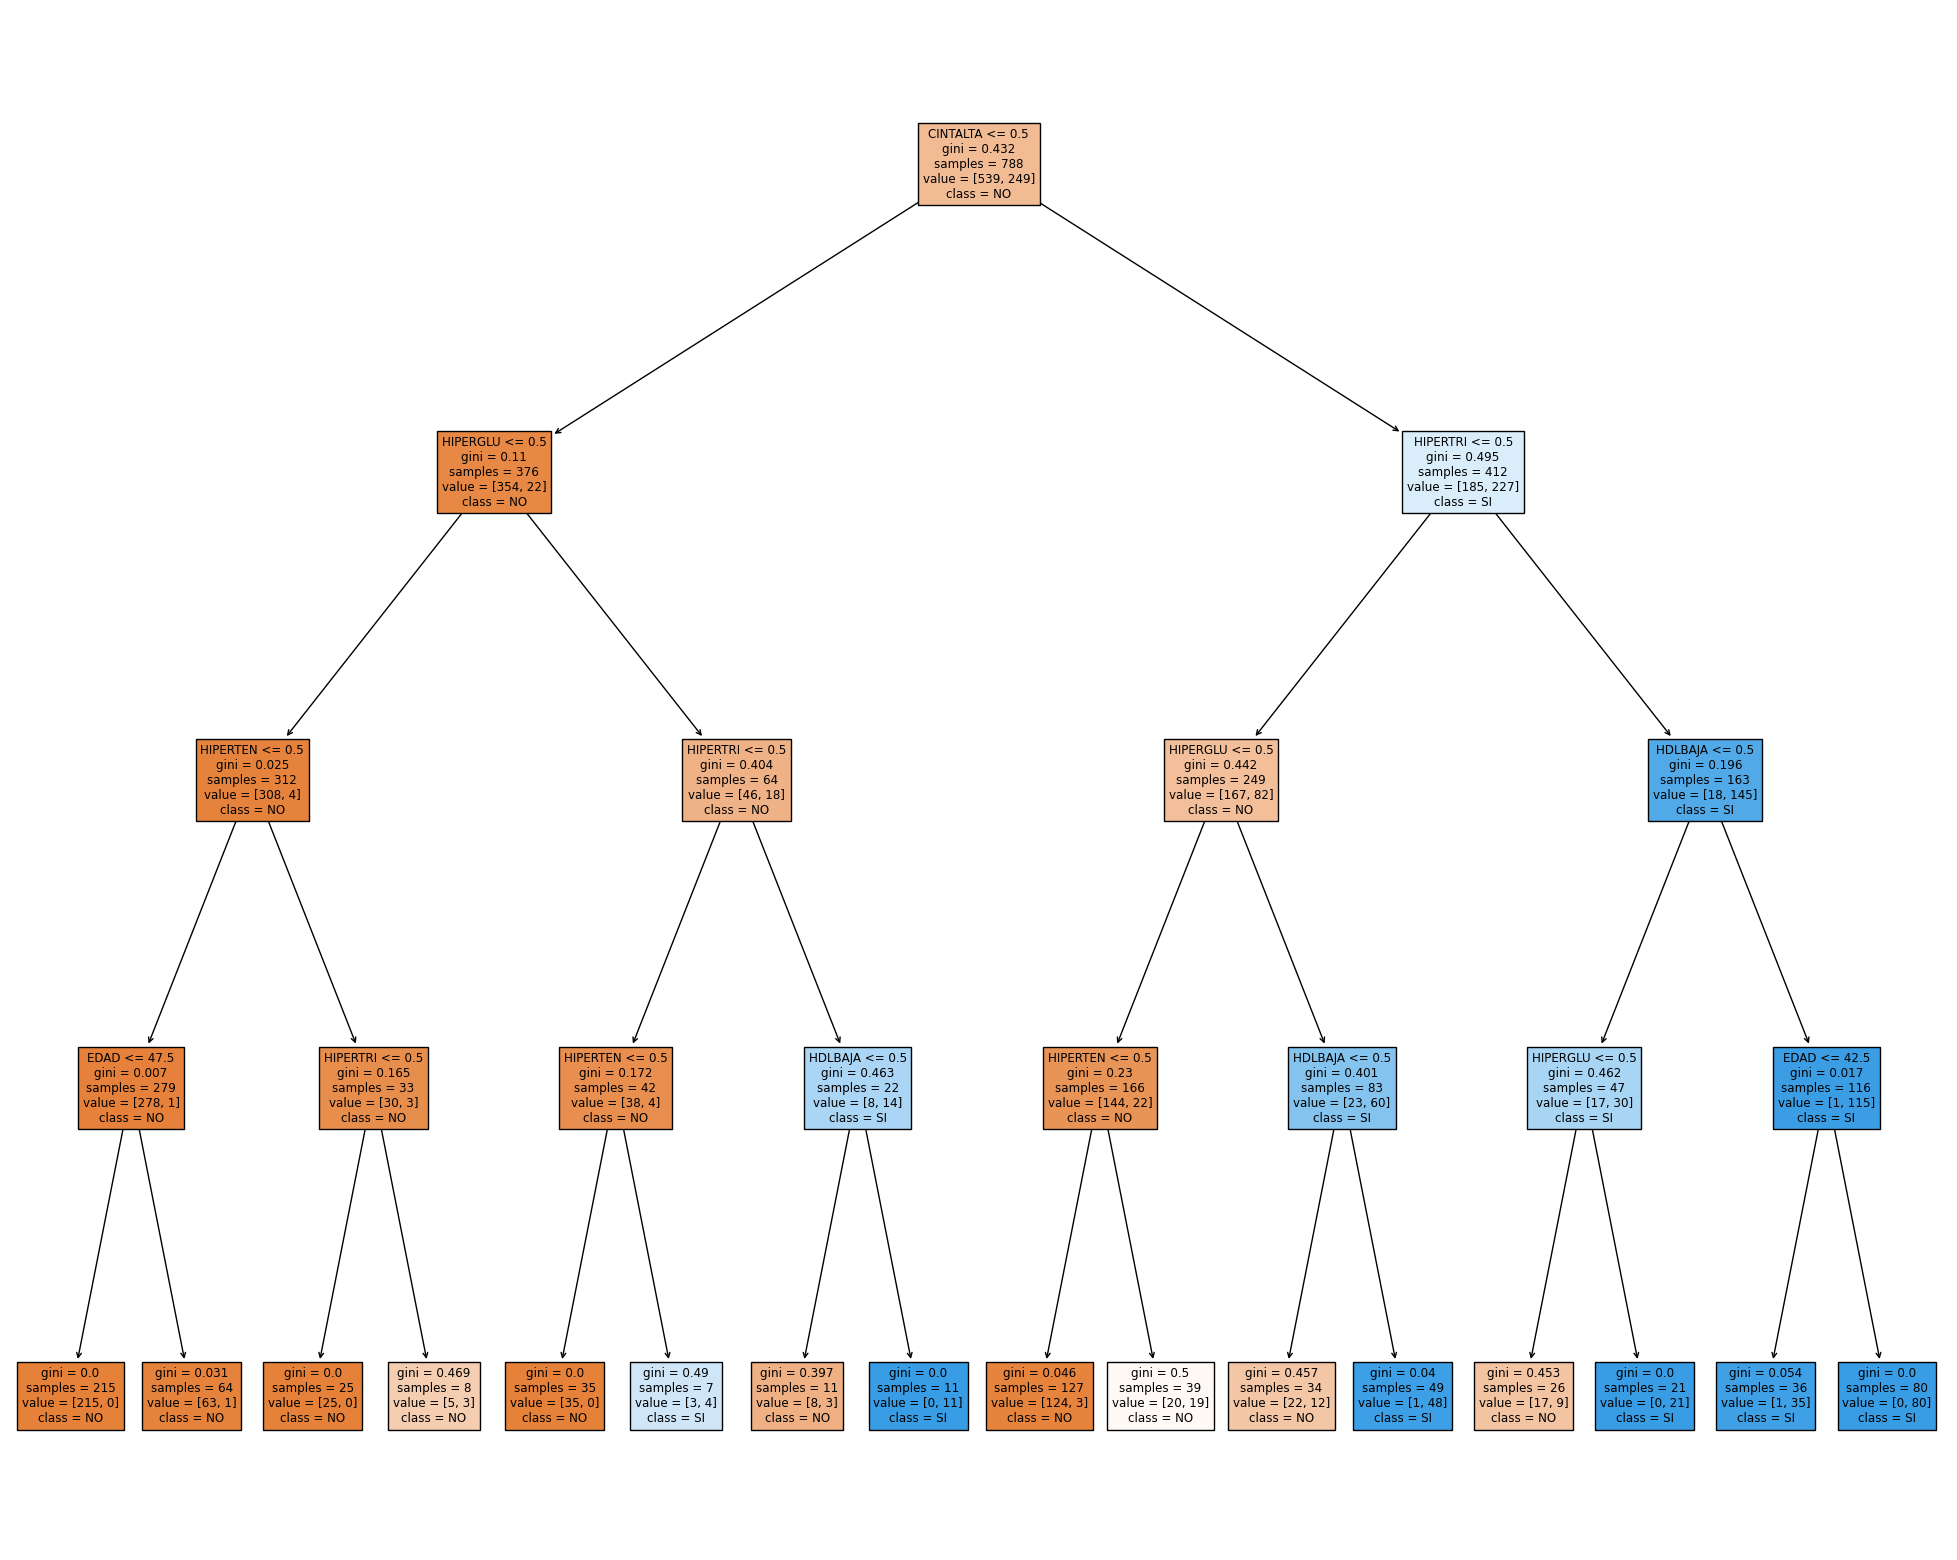

La matriz de confusión es:


array([[146,   4],
       [  7,  40]])

In [15]:
#Separamos el dataset en variables predictoras y variables a predecir
X1 = pacientes.iloc[:,1:11] #Predictoras
Y1 = pacientes.iloc[:,0] #A predecir

# Tomamos los datos para prueba y entrenamiento, donde:
# Entrenamiento: X1_train, Y1_train
# Prueba: X1_test, Y1_test

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, train_size=0.80, random_state=0)

# GENERAMOS EL ÁRBOL DE DECISIÓN 
arbol1 = DecisionTreeClassifier(max_depth=4)
#arbol1 = DecisionTreeClassifier() #ARBOL DE DESICION COMPLETO
ArbEnfer1 = arbol1.fit(X1_train, Y1_train)

# Mostramos el árbol completo en pantalla
ima1 = plt.figure(figsize=(25,20))
tree.plot_tree(ArbEnfer1, feature_names=list(X1.columns.values), class_names=list(Y1.values), filled=True)
plt.show()
# Guardamos el resultado del árbol en una imagen
ima1.savefig('Árbol de decisión 1.png')

#Nota: todas las flechas de lado izquierdo que aparecen en el árbol pertenecen a la respuesta verdadero
# y las flechas del lado derecho pertenecen a la respuesta falso

# Obtenemos la precisión del modelo, par esto creamos una matriz de confusión 
Y1_pred = ArbEnfer1.predict(X1_test) #Valores predichos
MatConf1 = confusion_matrix(Y1_test, Y1_pred)
print("La matriz de confusión es:")
MatConf1

In [16]:
#Calculamos la precisión del modelo
Precision1 = np.sum(MatConf1.diagonal())/np.sum(MatConf1)

# Calculamos la precisión por cada una de las clases
NoEnf_precision1 = ((MatConf1[0,0]))/sum(MatConf1[0,])
print("Precisión de personas no enfermas:", NoEnf_precision1)
SiEnf_precision1 = ((MatConf1[1,1]))/sum(MatConf1[1,])
print("Precisión de personas enfermas:", SiEnf_precision1)

Precisión de personas no enfermas: 0.9733333333333334
Precisión de personas enfermas: 0.851063829787234


### Comparación de resultados de la matriz de confusión y presición del modelo
- Cuando se usa el dataset completo (incluyendo la información de los pacientes si consumen alcohol o tabaco), la matriz de confusión es:
          146, 4
          7, 40

  * La precisión del modelo para pesonas no enfermas es de: 0.9733333333333334
  * La precisión del modelo para pesonas enfermas es de: 0.851063829787234

- Cuando se usa el dataset incompleto (sin usar la información sobre si los pacientes consumen alcohol o tabaco), la matriz de confusión es:
          131,  19
          0, 47
 
 * La precisión del modelo para pesonas no enfermas es de: 0.8733333333333333
  * La precisión del modelo para pesonas enfermas es de: 1.0

